In [2]:
import numpy as np

lucky_box = np.load('luckybox.npy')
unique, count = np.unique(lucky_box, return_counts=True)

In [4]:
gt_probability = {}
for n, cnt in zip(unique, count):
    gt_probability[str(int(n))] = cnt/np.sum(count)
gt_probability

{'0': 0.714285712244898,
 '1': 2.857142848979592e-09,
 '2': 0.01428571424489796,
 '3': 0.042857142734693876,
 '4': 0.05714285697959184,
 '5': 0.1714285709387755}

In [5]:
def check(error):
    if error < 0.0001 :
        print('pass the test')
    else:
        print('fail the test')
        
def eval(my_probability):
    error = 0
    for key, _ in gt_probability.items():
        error += np.abs(gt_probability[key]-my_probability[key])
    # print(gt_probability)
    # print(my_probability)
    # print('error: ', error)
    return error
    
my_probability = {'0': 1/6, '1': 1/6, '2': 1/6, '3': 1/6, '4': 1/6, '5': 1/6}
error = eval(my_probability)
check(error)

fail the test


## 이번 실습은 numpy library를 사용하지 않고 구현해야 합니다.

### 1번 문제: 전체 탐색을 통한 counting 

In [6]:
### Your code - Start ###

cnt = [0] * 6
size = len(lucky_box)

for i in lucky_box:
    cnt[int(i)] += 1

my_probability = {
    '0': cnt[0]/size,
    '1': cnt[1]/size,
    '2': cnt[2]/size,
    '3': cnt[3]/size,
    '4': cnt[4]/size,
    '5': cnt[5]/size
}

### Your code - End ###

error = eval(my_probability)
check(error)

pass the test


### 2번 문제: random sampling을 통한 counting

In [7]:
import random

### Your code - Start ###

def random_sampling(trial):
    cnt = [0] * 6
    size = len(lucky_box)

    for i in range(trial):
        rNum = random.randrange(size)
        cnt[int(lucky_box[rNum])] += 1

    prob = {
        '0': cnt[0]/trial,
        '1': cnt[1]/trial,
        '2': cnt[2]/trial,
        '3': cnt[3]/trial,
        '4': cnt[4]/trial,
        '5': cnt[5]/trial
    }

    return prob

trial = 100_000_000
my_probability = random_sampling(trial)

### Your code - End ###

error = eval(my_probability)
check(error)

pass the test


In [8]:
print(my_probability)

{'0': 0.71429771, '1': 0.0, '2': 0.01429504, '3': 0.04286934, '4': 0.0571332, '5': 0.17140471}


### 3번 error analysis

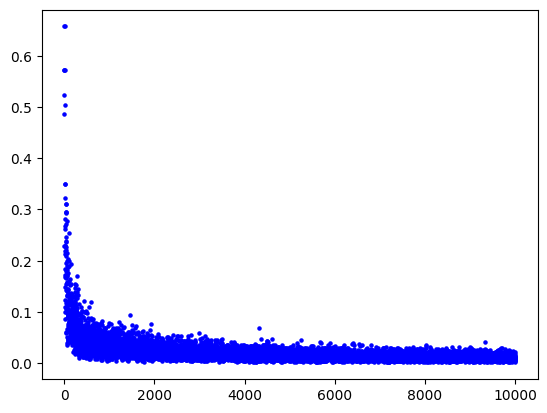

In [9]:
import random
import matplotlib.pyplot as plt

### Your code - Start ###

x = []
y = []
for trial in range(1, 10_000):
    prob = random_sampling(trial)
    x.append(trial)
    y.append(eval(prob))

plt.scatter(x, y, color='blue', s=5)
plt.show()

### Your code - End ###

### 고찰

구현에 크게 어려움은 없었다.

다만 코드를 짜보면서 느낀 점들이 있다.
 - 반복에 따른 확률 변화를 직접 보면서 전체 counting을 통한 확률 분석과 random sampling을 통한 확률 분석이 크게 다르지 않다는 것을 느꼈다.
 - 물론 random sampling시 일정 수준 이상의 반복을 해야하는 것은 마찬가지이지만, 특정 값을 지나면 확률이 크게 변하지 않는 것을 확인할 수 있다.
 - 반복횟수가 무한에 가까워질수록 전체 counting을 통해 구한 확률과 같아진다.